In [ ]:
"""
Leer fotograma:
"""

'\nLeer fotograma:\n'

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import glob
import cv2
import os
import random
import imutils
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier          ## Algorithm KNN
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## Sacar frames de vídeos de cada nodo

In [ ]:
# ruta a directorio de imagenes
path_DB= "/gdrive/My Drive/TFM/"

# directorios para cada landmark
nodes = ["nodo0", "nodo1", "nodo2", "nodo3", "nodo4", "nodo5", "nodo6", "nodo7", "nodo8"]

# check if the path exist
for node in nodes:
  if glob.glob(path_DB+node+"/" ):# + "*.jpg"
    print("ok: "+ node)

ok: nodo0
ok: nodo1
ok: nodo2
ok: nodo3
ok: nodo4
ok: nodo5
ok: nodo6
ok: nodo7
ok: nodo8


In [ ]:
"""im = cv2.imread(path_DB+ node+ "/"+ node+"_0.png")
print(im.shape)"""

(256,)


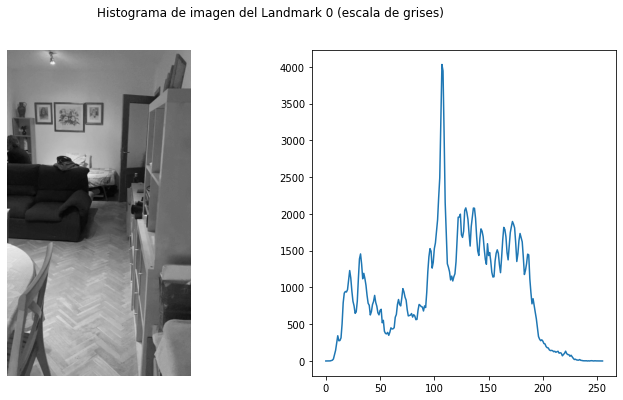

In [ ]:
import matplotlib.pyplot as plt

node = "nodo0"
list_images = os.listdir(path_DB + "/%s/" % node)
imgp = path_DB + "/" + node  + "/" + list_images[100] #guardar dirección completa

#for i in range(ntotal):
#print(list_images[i])
img = cv2.imread(imgp) #cargo imagen con dirección completa
resized = cv2.resize(img, (360, 640), interpolation = cv2.INTER_AREA)
"""b,g,r = cv2.split(resized)

equ_b = cv2.equalizeHist(b)
equ_g = cv2.equalizeHist(g)
equ_r = cv2.equalizeHist(r)

resized = cv2.merge((equ_b, equ_g, equ_r))
print(resized.shape)
histb = cv2.calcHist([resized],[0],None,[256],[0,256])
histg = cv2.calcHist([resized],[1],None,[256],[0,256])
histr = cv2.calcHist([resized],[2],None,[256],[0,256])


all = [histb, histg, histr]
print(len(all))
c = ['b', 'g', 'r']
print(equ_b.shape)

plt.figure(figsize=(13, 13))
for num,col in enumerate(c):
  plt.plot(all[num], color = col)
  #plt.xlim([0, 256])"""

resized = cv2.resize(img, (360, 640), interpolation = cv2.INTER_AREA)              #resize to 32x32x3 dimensions   
bn = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([bn],[0], None, [256], [0,256])
print(hist.flatten().shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Histograma de imagen del Landmark 0 (escala de grises)')
ax1.imshow(bn, cmap= "gray")
ax1.axis("off")
ax2.plot(hist)
plt.savefig('/gdrive/My Drive/TFM/histograma_BN.png')
#plt.xlim([0, 256])

In [ ]:


train_x = []    #train images
train_y = []    #train labels
test_x = []     #test images
test_y = []     #test labels
n = 0

dim = (360, 640)  # anchox alto: dimension por defecto de frames
#dim = (960, 540) #otra dimension para no perder datos ??

# para cada conjunto de imagenes de landmarks:
for node in nodes:

  list_images = os.listdir(path_DB + "/%s/" % node)  # listar las imagenes del landmark
  ntotal= len(list_images)
  ntrain= int(ntotal*0.85) # 70 % para train y 15% para validation = 85% para entrenamiento knn
  ntest = int(ntotal*0.15)

  random.seed(2021)
  random.shuffle(list_images)     # mezclar las imagenes del landmark
  #list_images = list_images[:(ntrain+ntest)]  # tomar el 85% de las imagenes
  for i in range(ntotal):
    imgp = path_DB + "/" + node  + "/" + list_images[i] #guardar dirección completa

    img = cv2.imread(imgp) #cargo imagen con dirección completa
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)              #resize to 32x32x3 dimensions   
    
    #HISTOGRAMAS BGR:
    """b,g,r = cv2.split(resized)

    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)

    resized = cv2.merge((equ_b, equ_g, equ_r))

    histb = cv2.calcHist([resized],[0],None,[256],[0,256])
    histg = cv2.calcHist([resized],[1],None,[256],[0,256])
    histr = cv2.calcHist([resized],[2],None,[256],[0,256])
    hist = np.concatenate((histb,histg, histr))"""

    #HISTOGRAMAS BN:
    bn = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([bn],[0], None, [256], [0,256])
    
    flattened = hist.flatten()
    list_images[i] = flattened

  for i in range(ntrain): #train
    train_x.append(list_images[i])
    train_y.append(n)
  for i in range(ntrain, ntotal): #test
    test_x.append(list_images[i])
    test_y.append(n)
    
  print("train,test and 2nd test sets of "+node + " done!")
      
  n += 1

train,test and 2nd test sets of nodo0 done!
train,test and 2nd test sets of nodo1 done!
train,test and 2nd test sets of nodo2 done!
train,test and 2nd test sets of nodo3 done!
train,test and 2nd test sets of nodo4 done!
train,test and 2nd test sets of nodo5 done!
train,test and 2nd test sets of nodo6 done!
train,test and 2nd test sets of nodo7 done!
train,test and 2nd test sets of nodo8 done!


In [ ]:
import csv

with open('/gdrive/My Drive/TFM/output.tsv', 'wt') as out_file:
  tsv_writer = csv.writer(out_file, delimiter='\t')
  for item in train_x:
    tsv_writer.writerow(item)

with open('/gdrive/My Drive/TFM/output_label.tsv', 'wt') as out_file:
  tsv_writer = csv.writer(out_file, delimiter='\t')
  tsv_writer.writerow(['landmark', "num"])
  for item in train_y:
    tsv_writer.writerow([item, item])

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1, )

# cross_validation kfold con k = 10
cv_scores = cross_val_score(neigh, train_x, train_y, cv=10, scoring='accuracy') 
media_cv_scores = np.mean(cv_scores)  
print(cv_scores) 
print(media_cv_scores)    

# leave-one-out
"""cv=LeaveOneOut()
cv_scores = cross_val_score(neigh, train_x, train_y, cv=cv, scoring='accuracy') 
media_cv_scores = np.mean(cv_scores)  
print(cv_scores) 
print(media_cv_scores)    
""" 
neigh.fit(train_x, train_y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


KNeighborsClassifier(n_neighbors=1)

In [ ]:
nodo_names = ['nodo 0', 'nodo 1', 'nodo 2', 'nodo 3', 'nodo 4', 'nodo 5', 'nodo 6', 'nodo 7', 'nodo 8']

prediction = neigh.predict(test_x)
print(classification_report(test_y, prediction, target_names=nodo_names))


              precision    recall  f1-score   support

      nodo 0       1.00      1.00      1.00        18
      nodo 1       1.00      1.00      1.00        18
      nodo 2       1.00      1.00      1.00        18
      nodo 3       1.00      1.00      1.00        18
      nodo 4       1.00      1.00      1.00        18
      nodo 5       1.00      1.00      1.00        18
      nodo 6       1.00      1.00      1.00        18
      nodo 7       1.00      1.00      1.00        18
      nodo 8       1.00      1.00      1.00        18

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



In [ ]:
import numpy as np
import cv2

%cd /gdrive/My Drive/TFM/histogramas/
cap = cv2.VideoCapture("hist_all.MOV")

# Define the codec and create VideoWriter object
# out = cv2.VideoWriter('video_BN.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 29.0, (1080,1920))
out = cv2.VideoWriter("video_BN_nuevo.avi", cv2.VideoWriter_fourcc(*'DIVX'), 29.0, ( 1920,1080))
count = 0
dim = (360, 640)  # ANCHO x ALTO dimension por defecto de frames

while(cap.isOpened()):
    ret, frame = cap.read()
    #print(frame.shape)
    if ret==True:
      rot = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
      resized = cv2.resize(rot, dim, interpolation = cv2.INTER_AREA)              #resize to 32x32x3 dimensions 

      """b,g,r = cv2.split(resized)

      equ_b = cv2.equalizeHist(b)
      equ_g = cv2.equalizeHist(g)
      equ_r = cv2.equalizeHist(r)

      resized = cv2.merge((equ_b, equ_g, equ_r))

      histb = cv2.calcHist([resized],[0],None,[256],[0,256])
      histg = cv2.calcHist([resized],[1],None,[256],[0,256])
      histr = cv2.calcHist([resized],[2],None,[256],[0,256])
      hist = np.concatenate((histb,histg, histr))"""

      bn = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
      hist = cv2.calcHist([bn],[0], None, [256], [0,256])
      flattened = hist.flatten()

      #prediction:
      result = neigh.predict([flattened])
      text = ""+ str(result[0])
      (w,h,c) = frame.shape
      #frame = cv2.resize(frame,(360,640))
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      frame = cv2.putText(frame, text, (10, 200), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)  


      # write the flipped frame
      out.write(frame)

    else:
        break

# Release everything if job is finished
cap.release()
out.release()

/gdrive/My Drive/TFM/histogramas


In [ ]:
import numpy as np
import cv2

%cd /gdrive/My Drive/TFM/histogramas/
cap = cv2.VideoCapture("hist_all.MOV")
fps = (cap.get(cv2.CAP_PROP_FPS))

total = (cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(fps, total)

secs = [(0, 174), (232, 348), (406, 551), (580,841), (1044, 1160), (1247, 1363), (1450, 1595), (1798, 2030), (2204, 2320), (1000000,1000000) ]
secs_y = [0,1,2,5,3,4,6,7,8, 9]

out = cv2.VideoWriter("ejemplo1.avi", cv2.VideoWriter_fourcc(*'DIVX'), 29.0, (1080, 1920))
count = 0
dim = (360, 640)  # ANCHO x ALTO dimension por defecto de frames
label = 0

#tp =0
#total_tp =[]
(first, last) = secs[0]
matriz = np.zeros((9,9))
while(cap.isOpened()):
    ret, frame = cap.read()
    #print(frame.shape)
    if ret==True:
      if count>last:
        secs = secs[1:]
        (first, last) = secs[0]
        secs_y = secs_y[1:]
        label = secs_y[0]
        #total_tp.append(tp)
        #tp = 0

      rot = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
   
      if count>= first:
        resized = cv2.resize(rot, dim, interpolation = cv2.INTER_AREA)              #resize to 32x32x3 dimensions 

        bn = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([bn],[0], None, [256], [0,256])
        flattened = hist.flatten()
        #prediction:
        result = neigh.predict([flattened])
        #if result[0] == label :
        
        matriz[label][result[0]]+= 1
        
        text = ""+ str(result[0]) + " "+ str(label)
        frame = cv2.putText(rot, text, (10, 200), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)


      # write the flipped frame
      out.write(frame)
      count +=1

    else:
        break

# Release everything if job is finished
cap.release()
out.release()

/gdrive/My Drive/TFM/histogramas
29.974608286368984 2420.0


In [ ]:
print(matriz)
print(np.sum(matriz))

for row in matriz:
  print(np.sum(row))
secs = [(0, 174), (232, 348), (406, 551), (580,841), (1044, 1160), (1247, 1363), (1450, 1595), (1798, 2030), (2204, 2320), (1000000,1000000) ]
for i,j in secs:
  print(j-i+1)

[[167.   7.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  41.   0.  28.  12.  36.   0.   0.]
 [  6.   0.  94.   0.  27.   0.   0.  19.   0.]
 [  0.   0.   9.  72.   1.   0.   3.  32.   0.]
 [  0.   0.  50.   1.  38.   0.   1.  27.   0.]
 [  0.   0.   0.   0.   0. 131.  57.   0.  74.]
 [  0.   0.   0.   0.   0.   0. 114.  27.   5.]
 [  0.   8.  42.   0.   0.   0.   0. 183.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  44.  73.]]
1430.0
175.0
117.0
146.0
117.0
117.0
262.0
146.0
233.0
117.0
175
117
146
262
117
117
146
233
117
1


In [ ]:
print(total_tp)

[167, 0, 94, 0, 1, 0, 114, 183, 73]


- histogramas de imagen en BN o a color ? 
- dimensiones ? las mismas? o menos?